In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Read the dataset
data = pd.read_csv("Heart.csv")
# Exclude the first column (serial number)
data = data.iloc[:, 1:]
data.dropna(inplace=True)
# Show the dataset head
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [60]:
# Separate the features and the target variable
features = data.drop("AHD", axis=1)  # Drop the target column
target = data["AHD"]

In [61]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
categorical_features = ["ChestPain", "Thal"]
for feature in categorical_features:
    features[feature] = label_encoder.fit_transform(features[feature])

# Encode the target variable
target = label_encoder.fit_transform(target)

# Print the encoded features and target
print("Encoded features:")
print(features.head())
print("\nEncoded target:")
print(target)


Encoded features:
   Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1          3     145   233    1        2    150      0      2.3   
1   67    1          0     160   286    0        2    108      1      1.5   
2   67    1          0     120   229    0        2    129      1      2.6   
3   37    1          1     130   250    0        0    187      0      3.5   
4   41    0          2     130   204    0        2    172      0      1.4   

   Slope   Ca  Thal  
0      3  0.0     0  
1      2  3.0     1  
2      2  2.0     2  
3      3  0.0     1  
4      1  0.0     1  

Encoded target:
[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1

We have found that the following Label Encoding Outcome:

ChestPain:
- 0: asymptomatic
- 1: nonanginal
- 2: nontypical
- 3: typical

Thal:
- 0: fixed
- 1: normal
- 2: reversable

AHD:
- 0: No
- 1: Yes

In [62]:
# Scale numeric features
numeric_features = ["RestBP", "Chol", "Fbs", "RestECG", "MaxHR", "ExAng", "Oldpeak", "Slope", "Ca"]
scaler = StandardScaler()
features[numeric_features] = scaler.fit_transform(features[numeric_features])

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [68]:
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_preds = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_preds)
print("Logistic Regression Accuracy:", logreg_accuracy)
logreg_cm = confusion_matrix(y_test, logreg_preds)

Logistic Regression Accuracy: 0.8666666666666667


In [70]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_accuracy)
dt_cm = confusion_matrix(y_test, dt_preds)

Decision Tree Accuracy: 0.8166666666666667


In [71]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_accuracy)
knn_cm = confusion_matrix(y_test, knn_preds)

KNN Accuracy: 0.75


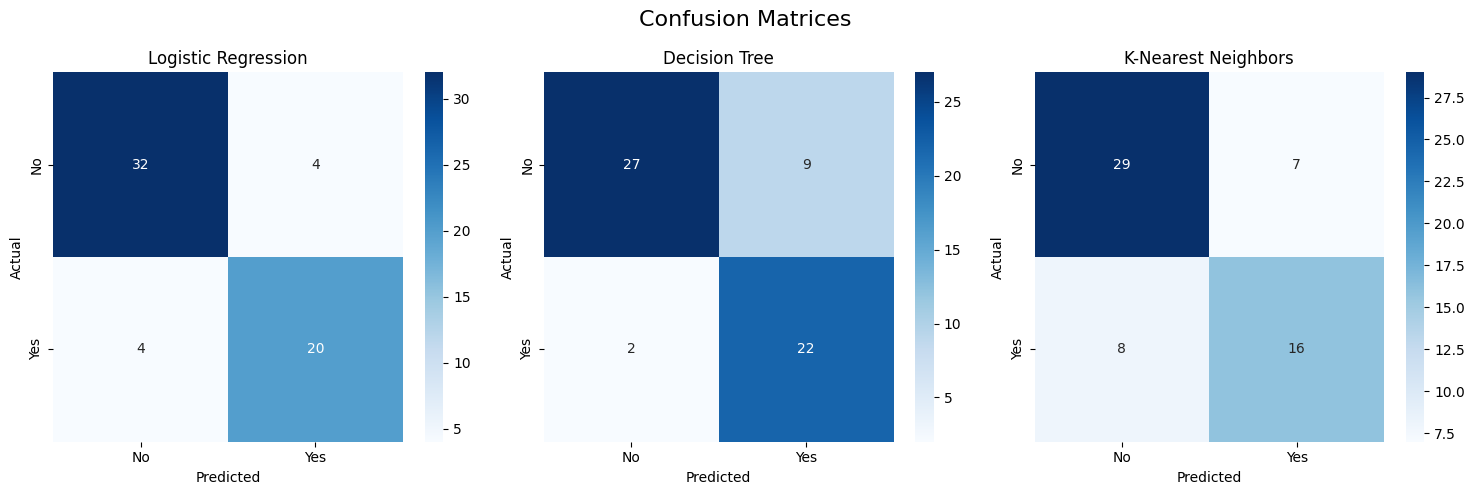

In [79]:
# Plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
class_labels = label_encoder.classes_
model_names = ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors']

for ax, cm, model_name in zip(axes, [logreg_cm, dt_cm, knn_cm], model_names):
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(model_name)
    ax.xaxis.set_ticklabels(class_labels)
    ax.yaxis.set_ticklabels(class_labels)

fig.suptitle('Confusion Matrices', fontsize=16)
plt.tight_layout()
plt.show()